# The Iris dataset
## Visualization

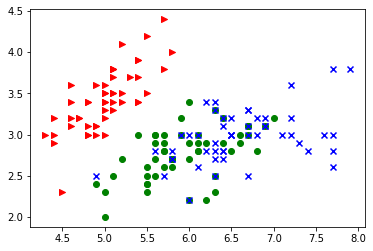

In [2]:
from matplotlib import pyplot as plt
import numpy as np
# We load the data with load_iris from sklearn
from sklearn.datasets import load_iris
data = load_iris()
# load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    plt.scatter(features[target == t,0], features[target == t,1], marker=marker, c=c)

## Building our first classification model

In [3]:
# We use NumPy fancy indexing to get an array of strings:
labels = target_names[target]
# The petal length is the feature at position 2
plength = features[:, 2]
# Build an array of booleans:
is_setosa = (labels == 'setosa')
# This is the important step:
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))

Maximum of setosa: 1.9.


In [4]:
print('Minimum of others: {0}.'.format(min_non_setosa))

Minimum of others: 3.0.


In [5]:
# ~ is the boolean negation operator
features = features[~is_setosa]
labels = labels[~is_setosa]
# Build a new target variable, is_virginica
is_virginica = (labels == 'virginica')

In [6]:
# Initialize best_acc to impossibly low value
best_acc = -1.0
for fi in range(features.shape[1]):
    # We are going to test all possible thresholds
    thresh = features[:,fi]
    for t in thresh:
        # Get the vector for feature `fi`
        feature_i = features[:, fi]
        #apply threshold `t`
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False

        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

In [7]:
def is_virginica_test(fi, t, reverse, example):
    "Apply threshold model to a new example"
    test = example[fi] > t
    if reverse:
        test = not test
    return test

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

correct = 0.0
for ei in range(len(features)):
    # select all but the one at position `ei`:
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = knn.fit(features[training], is_virginica[training])
    predictions = knn.predict(features[testing])
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 95.0%


## Building more complex classifiers

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

# from sklearn.cross_validation import KFold
# kf = KFold(len(features), n_folds=5, shuffle=True)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

# `means` will be a list of mean accuracies (one entry per fold)
means = []
for training,testing in kf.split(features):
    # We fit a model for this fold, then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print("Mean accuracy: {:.1%}".format(np.mean(means)))

Mean accuracy: 93.0%


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

means = []
for training,testing in kf.split(features):
    # We learn a model for this fold with `fit` and then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], target[training])
    prediction = classifier.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == target[testing])
    means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))

Mean accuracy: 94.0%
